In [2]:
import pandas as pd
import glob

# Find all Day CSVs
all_files = sorted(glob.glob("Day-*.csv"))

# Combine into one DataFrame
df_list = [pd.read_csv(f) for f in all_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Optional: Save the merged file
combined_df.to_csv("All_Days_Combined.csv", index=False)
print("All files merged into All_Days_Combined.csv")


All files merged into All_Days_Combined.csv


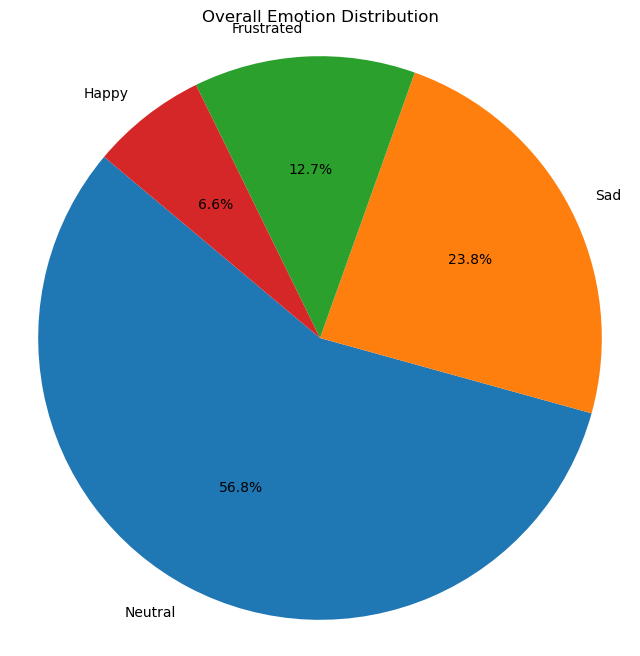

In [3]:
import matplotlib.pyplot as plt

emotion_counts = combined_df['Emotion'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Overall Emotion Distribution')
plt.axis('equal')
plt.show()


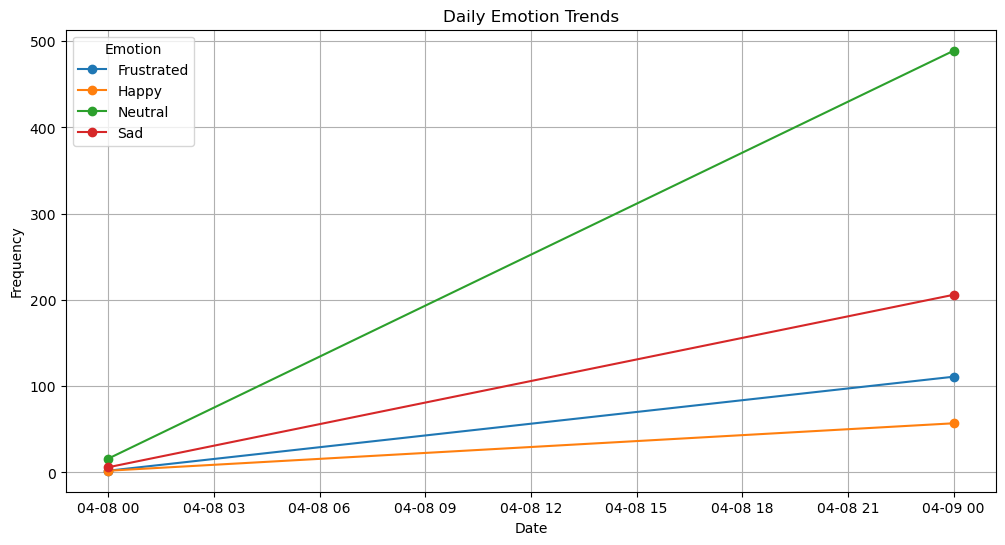

In [4]:
combined_df['Timestamp (IST)'] = pd.to_datetime(combined_df['Timestamp (IST)'])
combined_df['Date'] = combined_df['Timestamp (IST)'].dt.date

# Count each emotion per day
emotion_daily = combined_df.groupby(['Date', 'Emotion']).size().unstack().fillna(0)

emotion_daily.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Daily Emotion Trends")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [5]:
most_common_emotion = combined_df['Emotion'].mode()[0]
print(f"Most common emotion: {most_common_emotion}")

frustrated_day = combined_df[combined_df['Emotion'] == 'Frustrated']['Timestamp (IST)'].dt.date.mode()[0]
print(f"Most frustrated day: {frustrated_day}")


Most common emotion: Neutral
Most frustrated day: 2025-04-09


2025-05-05 17:22:13.791 
  command:

    streamlit run C:\Users\haris\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


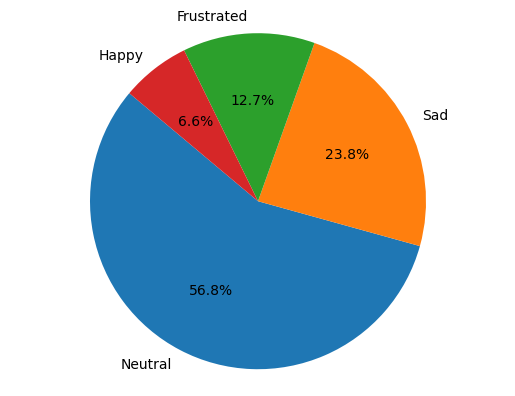

In [1]:
import streamlit as st
import pandas as pd
import glob
import matplotlib.pyplot as plt

st.set_page_config(page_title="Emotion Trend Analyzer", layout="wide")

st.title("😄 Emotion Trend Analyzer")

# Load all Day CSVs
all_files = sorted(glob.glob("Day-*.csv"))
df_list = [pd.read_csv(file) for file in all_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Convert timestamp
combined_df['Timestamp (IST)'] = pd.to_datetime(combined_df['Timestamp (IST)'])
combined_df['Date'] = combined_df['Timestamp (IST)'].dt.date
combined_df['Hour'] = combined_df['Timestamp (IST)'].dt.hour

# Sidebar Filters
st.sidebar.header("📅 Filters")
selected_date = st.sidebar.multiselect("Select Dates", combined_df['Date'].unique(), default=combined_df['Date'].unique())
selected_emotions = st.sidebar.multiselect("Select Emotions", combined_df['Emotion'].unique(), default=combined_df['Emotion'].unique())

# Filtered Data
filtered_df = combined_df[
    (combined_df['Date'].isin(selected_date)) & 
    (combined_df['Emotion'].isin(selected_emotions))
]

# Show Data
st.subheader("📄 Filtered Data")
st.dataframe(filtered_df)

# Emotion Count Pie
st.subheader("📊 Overall Emotion Distribution")
emotion_counts = filtered_df['Emotion'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
ax1.axis('equal')
st.pyplot(fig1)

# Daily Trends Line Plot
st.subheader("📈 Daily Emotion Trends")
daily_emotions = filtered_df.groupby(['Date', 'Emotion']).size().unstack().fillna(0)
st.line_chart(daily_emotions)

# Heatmap by Hour
st.subheader("🕒 Hourly Emotion Distribution")
hourly_emotions = filtered_df.groupby(['Hour', 'Emotion']).size().unstack().fillna(0)
st.bar_chart(hourly_emotions)

# Insights
st.subheader("📌 Key Insights")
most_common_emotion = filtered_df['Emotion'].mode()[0]
st.markdown(f"- **Most common emotion overall**: `{most_common_emotion}`")

frustrated_df = filtered_df[filtered_df['Emotion'].str.lower() == 'frustrated']
if not frustrated_df.empty:
    top_frustrated_day = frustrated_df['Date'].mode()[0]
    st.markdown(f"- **Most frustrated day**: `{top_frustrated_day}`")
else:
    st.markdown("- 😌 No 'Frustrated' emotion detected in filtered data.")

